Deaths Per Day
            Daily Deaths Addition
Date                             
2021-05-10                  399.0
2021-05-11                  684.0
2021-05-12                  848.0
2021-05-13                  802.0
2021-05-14                  745.0


<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

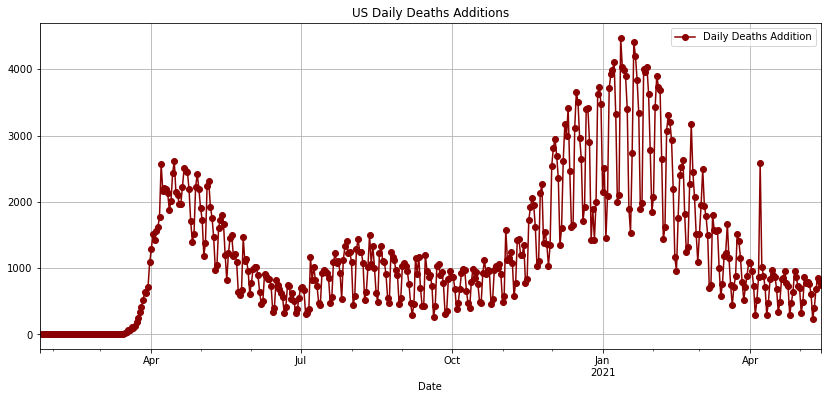

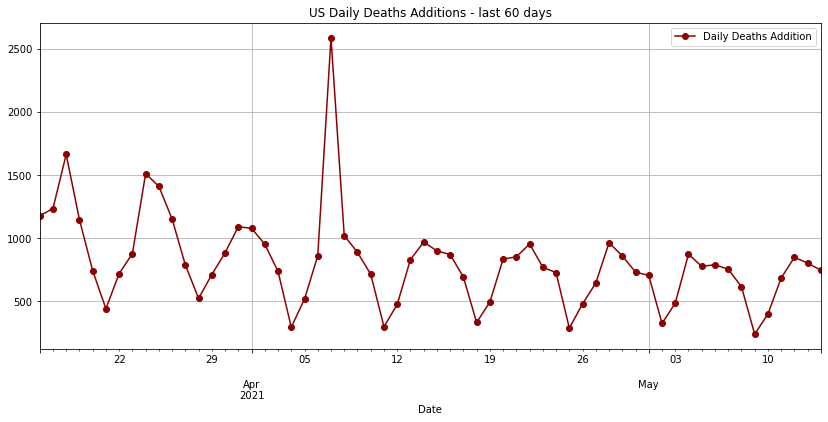

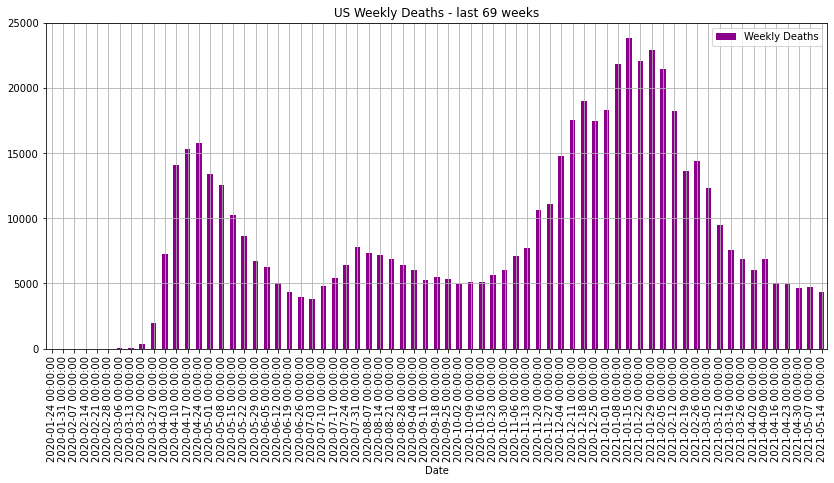

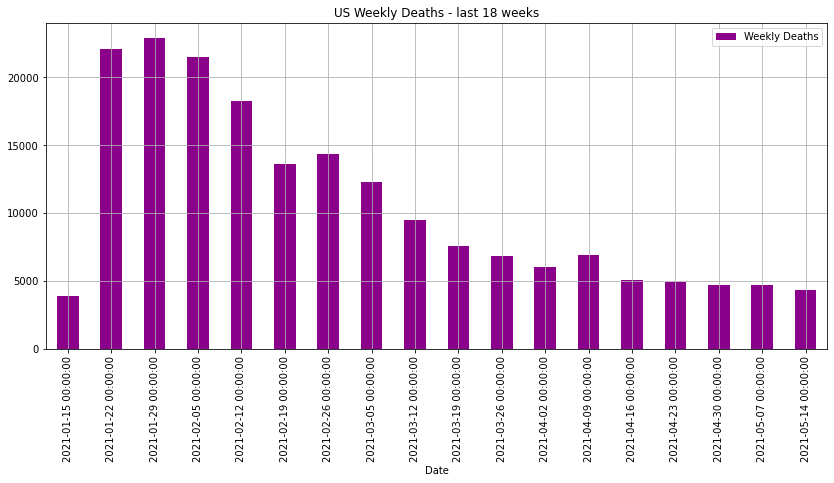

New Cases Per Day
            Daily Cases Addition
Date                            
2021-05-10               36898.0
2021-05-11               33651.0
2021-05-12               35878.0
2021-05-13               38087.0
2021-05-14               42298.0


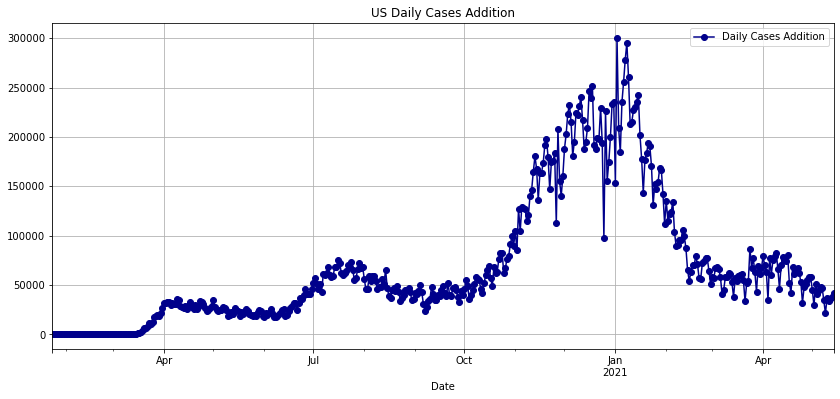

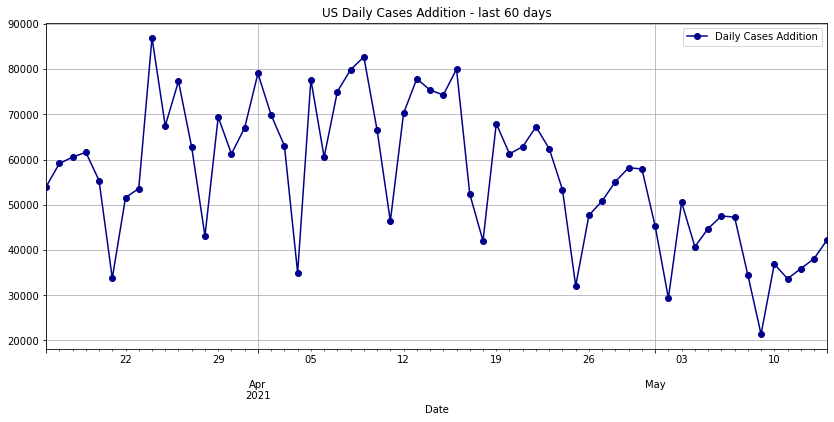

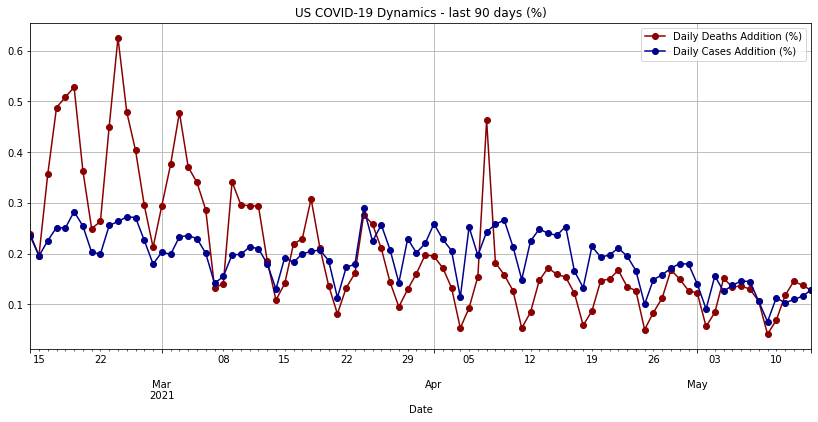

In [1]:
import covid_19_shared
covid_19_shared.Country_COVID19_Stats("US").show()

In [2]:
df = covid_19_shared.get_all_states_stats()

Getting population...


HTTPError: HTTP Error 504: Gateway Time-out

In [ ]:
import pandas as pd
df["PopulShare"] =df.Population * 100 / df.Population.sum()

df["Confirmed"] = pd.Series(index=df.index, data=[(v.cv_data_.Confirmed[-1]) for v in df["Statistics"]])
df["OneDayConf"] = pd.Series(index=df.index
                             , data=[v.cv_data_.Confirmed[-1] - v.cv_data_.Confirmed[-2] 
                                     for v in df["Statistics"]])
df["OneWeekConfirmed"] = pd.Series(index=df.index, data=[(v.cv_data_.Confirmed[-1] - v.cv_data_.Confirmed[-8]) for v in df["Statistics"]])

df["ConfShare"] = df.Confirmed * 100 / df.Confirmed.sum()
df["NewConfShare"] = df.OneWeekConfirmed * 100 / df.OneWeekConfirmed.sum()  # using one week stats

df["Deaths"] = pd.Series(index=df.index, data=[(v.cv_data_.Dead[-1]) for v in df["Statistics"]])
df["OneDayDeaths"] = pd.Series(index=df.index, data=[v.cv_data_.Dead[-1] - v.cv_data_.Dead[-2] for v in df["Statistics"]])
df["OneWeekDeaths"] = pd.Series(index=df.index, data=[v.cv_data_.Dead[-1] - v.cv_data_.Dead[-8] for v in df["Statistics"]])

df["DeathsShare"] = df.Deaths * 100 / df.Deaths.sum()
df["NewDeathsShare"] = df.OneWeekDeaths * 100 / df.OneWeekDeaths.sum()
df["LastDayDeathsShare"] = df.OneDayDeaths * 100 / df.OneDayDeaths.sum()

# Indicator of intensity
# "Density" as ratio of value share to population share
df["CasesDensity"] = df.ConfShare / df.PopulShare
df["NewCasesDensity"] = df.NewConfShare / df.PopulShare

df["DeathsDensity"] = df.DeathsShare / df.PopulShare
df["NewDeathsDensity"] = df.NewDeathsShare / df.PopulShare


In [ ]:
# df3 = df.copy()
# del df3["Statistics"]
df3 = df[[
          "OneWeekDeaths"
          , "OneDayDeaths"
          
          , "CasesDensity"
          , "NewCasesDensity"
          
          , "DeathsDensity"
          , "NewDeathsDensity"

          , "NewDeathsShare"
          , "LastDayDeathsShare"
         ]]
# dropping statistics column 
# df4 = df3.sort_values("NewDeathsShare", ascending=False)
df4 = df3.sort_values("NewDeathsDensity", ascending=False)
# df4 = df3.sort_values("DeathsDensity", ascending=False)
# df4 = df3.sort_values("OneDayDeaths", ascending=False)
df4 = df3.sort_values("OneWeekDeaths", ascending=False)
# df4 = df3.sort_values("DeathsDensity", ascending=False)
df4